In [1]:
import warnings 
warnings.filterwarnings('ignore')

# Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset

In [3]:
df = pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Data Preprocessing

In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
#fill the missing values 
for col,value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Explore Data Analysis (EDA)

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Our model can not tack string that's why convert type into the 0 or 1

In [10]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [11]:
df['type'] = df['type'].map({'white': 0,'red':1})

In [12]:
df['type'].value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [13]:
df['type'].unique()

array([0, 1], dtype=int64)

# Data Analysis using Graph

In [14]:
corr = df.corr()
corr

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,0.486913,0.652606,-0.187073,-0.348982,0.512596,-0.471644,-0.700357,0.390645,0.328514,0.486662,-0.032970,-0.119323
fixed acidity,0.486913,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.652606,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,-0.187073,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.348982,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.512596,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.471644,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.700357,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.390645,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,0.328514,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356


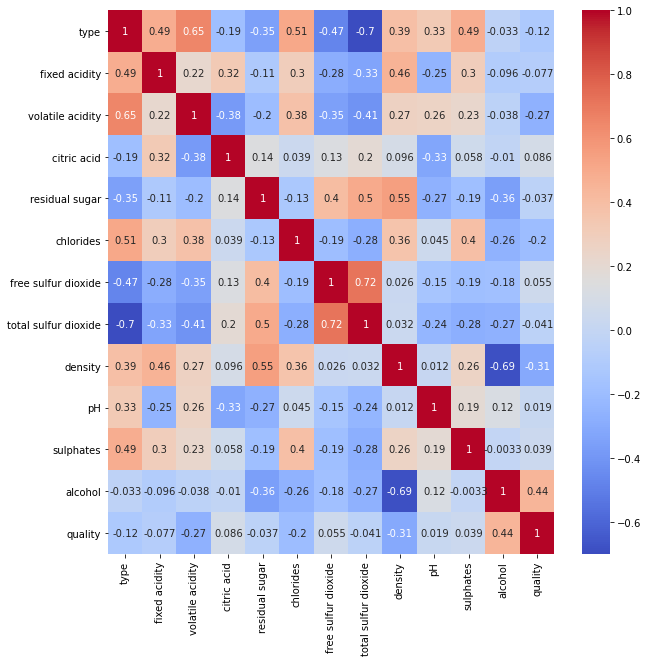

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

# prepare an independent variable

In [20]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
x = df.drop(columns=['quality','type'])
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


# prepare a dependent variable

In [28]:
y = df['quality']
y

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [29]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# train and test the model

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [36]:
x_train.shape

(5197, 11)

In [35]:
x_test.shape

(1300, 11)

In [37]:
y_train.shape

(5197,)

In [38]:
x_test.shape

(1300, 11)

# Fitting the data

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [40]:
x_train

array([[-0.55275311, -0.54830663, -0.33031822, ..., -0.11655341,
        -0.27445201, -0.31935936],
       [-1.01854974, -0.12047217, -0.26112195, ...,  0.00804306,
         0.26727298,  2.18704539],
       [-0.78565143, -1.34285634,  0.15405569, ...,  1.25400783,
        -0.13902076, -1.23837444],
       ...,
       [-0.00932371, -0.73166425, -0.26112195, ..., -0.86413228,
         0.40270423,  0.68320254],
       [-0.63038588, -0.48718742, -0.39951449, ..., -0.80183404,
         0.06412611, -0.98773396],
       [-0.63038588, -0.42606821,  0.91521468, ..., -0.24114989,
        -0.34216763, -0.82064031]])

In [41]:
x_test

array([[-1.71724469, -0.05935296, -0.95308467, ..., -0.24114989,
        -0.88389262,  0.43256207],
       [-0.55275311, -0.97614109,  1.12280349, ..., -1.48711466,
         0.53813547, -1.65610856],
       [ 1.93149559,  2.14093856,  0.01566314, ...,  0.44413073,
         0.6058511 , -0.31935936],
       ...,
       [-0.16458925, -0.60942584,  0.15405569, ..., -0.98872875,
        -0.95160824,  1.18448349],
       [-0.47512034, -0.67054505, -0.39951449, ...,  0.8802184 ,
         0.47041985, -0.40290619],
       [ 0.06830906,  0.42960071, -0.53790703, ..., -0.11655341,
        -0.816177  , -0.48645301]])

# Building a machine learning model


# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pre = model.predict(x_test)
y_pre

array([6, 6, 5, ..., 6, 6, 5], dtype=int64)

In [44]:
y_test

4603    6
4014    6
6206    5
1807    6
4416    5
       ..
3211    6
1533    6
918     6
1416    6
305     6
Name: quality, Length: 1300, dtype: int64

In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pre))

0.553076923076923


In [47]:
model_acc = accuracy_score(y_test,y_pre)
print(model_acc)

0.553076923076923


In [48]:
result = pd.DataFrame()
result

""


In [49]:
tempResult = pd.DataFrame({'Algorithm':['Logistic Regression'], 'Accurancy':[model_acc]})
result = pd.concat([result, tempResult])
result = result[['Algorithm','Accurancy']]
result

,Algorithm,Accurancy
0,Logistic Regression,0.553077


# Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pre = dtc.predict(x_test)
y_pre

array([7, 6, 5, ..., 7, 6, 6], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pre))

0.5807692307692308


In [54]:
dtc_acc = accuracy_score(y_test,y_pre)
print(dtc_acc)

0.5807692307692308


In [55]:
tempResult = pd.DataFrame({'Algorithm':['Decision Tree Classifier'], 'Accurancy':[dtc_acc]})
result = pd.concat([result, tempResult])
result = result[['Algorithm','Accurancy']]
result

,Algorithm,Accurancy
0,Logistic Regression,0.553077
0,Decision Tree Classifier,0.580769


# Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
y_pre = rfc.predict(x_test)
y_pre

array([6, 6, 5, ..., 6, 6, 6], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pre))

0.6915384615384615


In [60]:
rfc_acc = accuracy_score(y_test, y_pre)
print(rfc_acc)

0.6915384615384615


In [61]:
tempResult = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accurancy':[rfc_acc]})
result = pd.concat([result, tempResult])
result = result[['Algorithm','Accurancy']]
result

,Algorithm,Accurancy
0,Logistic Regression,0.553077
0,Decision Tree Classifier,0.580769
0,Random Forest Classifier Method,0.691538


# Support Vector Classifier

In [63]:
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train,y_train)

SVC()

In [65]:
y_pre = svc.predict(x_test)
y_pre

array([6, 6, 5, ..., 6, 6, 5], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pre))

0.5753846153846154


In [67]:
svc_acc = accuracy_score(y_test, y_pre)
print(svc_acc)

0.5753846153846154


In [68]:
tempResult = pd.DataFrame({'Algorithm': ['Support Vector Classifier Method'], 'Accurancy':[svc_acc]})
result = pd.concat([result, tempResult])
result = result[['Algorithm','Accurancy']]
result

,Algorithm,Accurancy
0,Logistic Regression,0.553077
0,Decision Tree Classifier,0.580769
0,Random Forest Classifier Method,0.691538
0,Support Vector Classifier Method,0.575385
